## Information:
This script was used to tune the parameter of eps for DBSCAN.

Just run all the cells and you will get the same results and time needed as we did.

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
import time

## Experiment 1: With value of EPS = 0.1

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
def get_dummy(df,column):
    df_dummy = pd.get_dummies(df[column], prefix=f'cat{column}')
    return df_dummy

In [4]:
needs_encoding = ['EntryHeading','ExitHeading']
for i in needs_encoding:
    encode = get_dummy(train_df,i)
    test_encode = get_dummy(test_df,i)
    train_df = pd.concat([train_df, encode], axis=1)
    test_df = pd.concat([test_df, encode], axis=1)

In [5]:
Atlanta_train = train_df[train_df['City']=='Atlanta']
Boston_train = train_df[train_df['City']=='Boston']
Chicago_train = train_df[train_df['City']=='Chicago']
Philadelphia_train = train_df[train_df['City']=='Philadelphia']

In [6]:
model_not_X = ['RowId','EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Weekend',
       'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City']  

In [7]:
Atlanta_X = Atlanta_train.drop(model_not_X, axis = 1)
Atlanta_y1 = Atlanta_train["TotalTimeStopped_p20"]
Atlanta_y2 = Atlanta_train["TotalTimeStopped_p50"]
Atlanta_y3 = Atlanta_train["TotalTimeStopped_p80"]
Atlanta_y4 = Atlanta_train["DistanceToFirstStop_p20"]
Atlanta_y5 = Atlanta_train["DistanceToFirstStop_p50"]
Atlanta_y6 = Atlanta_train["DistanceToFirstStop_p80"]

In [8]:
Boston_X = Boston_train.drop(model_not_X, axis = 1)
Boston_y1 = Boston_train["TotalTimeStopped_p20"]
Boston_y2 = Boston_train["TotalTimeStopped_p50"]
Boston_y3 = Boston_train["TotalTimeStopped_p80"]
Boston_y4 = Boston_train["DistanceToFirstStop_p20"]
Boston_y5 = Boston_train["DistanceToFirstStop_p50"]
Boston_y6 = Boston_train["DistanceToFirstStop_p80"]

In [9]:
Chicago_X = Chicago_train.drop(model_not_X, axis = 1)
Chicago_y1 = Chicago_train["TotalTimeStopped_p20"]
Chicago_y2 = Chicago_train["TotalTimeStopped_p50"]
Chicago_y3 = Chicago_train["TotalTimeStopped_p80"]
Chicago_y4 = Chicago_train["DistanceToFirstStop_p20"]
Chicago_y5 = Chicago_train["DistanceToFirstStop_p50"]
Chicago_y6 = Chicago_train["DistanceToFirstStop_p80"]

In [10]:
Philadelphia_X = Philadelphia_train.drop(model_not_X, axis = 1)
Philadelphia_y1 = Philadelphia_train["TotalTimeStopped_p20"]
Philadelphia_y2 = Philadelphia_train["TotalTimeStopped_p50"]
Philadelphia_y3 = Philadelphia_train["TotalTimeStopped_p80"]
Philadelphia_y4 = Philadelphia_train["DistanceToFirstStop_p20"]
Philadelphia_y5 = Philadelphia_train["DistanceToFirstStop_p50"]
Philadelphia_y6 = Philadelphia_train["DistanceToFirstStop_p80"]

In [11]:
start = time.time()

In [12]:
def clustering(data):
    model = DBSCAN(eps=0.1)
    model.fit(data)
    return model.labels_

In [13]:
def clustering_plus_randomforest(X, Y):
    clustering_variables = ['Latitude', 'Longitude','Hour','Month']
    clustering_model_data = X.loc[:,clustering_variables]
    labels = clustering(clustering_model_data)
    X["clusteringlabel"] = labels
    
    #Creating the training and test sets
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    
    #Creating the random forest regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)

    #Fitting the regressor with training data
    regressor.fit(X_train, y_train)
    
    #Making predictions for the testing data
    y_pred = regressor.predict(X_validate)

    #Returning the RSME value
    return sqrt(mean_squared_error(y_validate, y_pred))

In [14]:
#Boston
Boston_outcome = [Boston_y1,Boston_y2,Boston_y3,Boston_y4,Boston_y5,Boston_y6]
Boston_rmse = []
for i in range(len(Boston_outcome)):
    RMSE = clustering_plus_randomforest(Boston_X, Boston_outcome[i])
    Boston_rmse.append(RMSE)

In [15]:
#Atlanta
Atlanta_outcome = [Atlanta_y1,Atlanta_y2,Atlanta_y3,Atlanta_y4,Atlanta_y5,Atlanta_y6]
Atlanta_rmse = []
for i in range(len(Atlanta_outcome)):
    RMSE = clustering_plus_randomforest(Atlanta_X, Atlanta_outcome[i])
    Atlanta_rmse.append(RMSE)

In [16]:
#Chicago
Chicago_outcome = [Chicago_y1,Chicago_y2,Chicago_y3,Chicago_y4,Chicago_y5,Chicago_y6]
Chicago_rmse = []
for i in range(len(Chicago_outcome)):
    RMSE = clustering_plus_randomforest(Chicago_X, Chicago_outcome[i])
    Chicago_rmse.append(RMSE)

In [17]:
#Philadelphia    
Philadelphia_outcome = [Philadelphia_y1,Philadelphia_y2,Philadelphia_y3,Philadelphia_y4,Philadelphia_y5,Philadelphia_y6]
Philadelphia_rmse = []
for i in range(len(Philadelphia_outcome)):
    RMSE = clustering_plus_randomforest(Philadelphia_X, Philadelphia_outcome[i])
    Philadelphia_rmse.append(RMSE) 

[6.371884340408322, 11.20185218571515, 18.82439883256455, 25.143348616258866, 50.24621749618439, 86.74760499816948]

Mean RMSE:  33.089217744883456


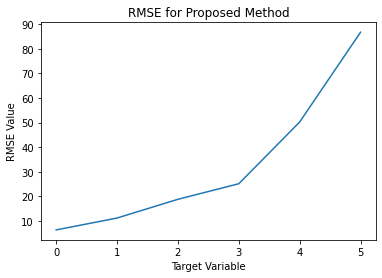

In [18]:
RMSE_new = []
for i in range(len(Boston_rmse)):
    RMSE = np.mean([Boston_rmse[i],Atlanta_rmse[i],Chicago_rmse[i],Philadelphia_rmse[i]])
    RMSE_new.append(RMSE)
print(RMSE_new)
print("\nMean RMSE: ", np.mean(RMSE_new))
plt.plot(RMSE_new)
plt.title('RMSE for Proposed Method')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()    

In [19]:
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 979.1455018520355


## Experiment 2: With value of EPS = 0.5

In [20]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [21]:
def get_dummy(df,column):
    df_dummy = pd.get_dummies(df[column], prefix=f'cat{column}')
    return df_dummy

In [22]:
needs_encoding = ['EntryHeading','ExitHeading']
for i in needs_encoding:
    encode = get_dummy(train_df,i)
    test_encode = get_dummy(test_df,i)
    train_df = pd.concat([train_df, encode], axis=1)
    test_df = pd.concat([test_df, encode], axis=1)

In [23]:
Atlanta_train = train_df[train_df['City']=='Atlanta']
Boston_train = train_df[train_df['City']=='Boston']
Chicago_train = train_df[train_df['City']=='Chicago']
Philadelphia_train = train_df[train_df['City']=='Philadelphia']

In [24]:
model_not_X = ['RowId','EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Weekend',
       'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City']  

In [25]:
Atlanta_X = Atlanta_train.drop(model_not_X, axis = 1)
Atlanta_y1 = Atlanta_train["TotalTimeStopped_p20"]
Atlanta_y2 = Atlanta_train["TotalTimeStopped_p50"]
Atlanta_y3 = Atlanta_train["TotalTimeStopped_p80"]
Atlanta_y4 = Atlanta_train["DistanceToFirstStop_p20"]
Atlanta_y5 = Atlanta_train["DistanceToFirstStop_p50"]
Atlanta_y6 = Atlanta_train["DistanceToFirstStop_p80"]

In [26]:
Boston_X = Boston_train.drop(model_not_X, axis = 1)
Boston_y1 = Boston_train["TotalTimeStopped_p20"]
Boston_y2 = Boston_train["TotalTimeStopped_p50"]
Boston_y3 = Boston_train["TotalTimeStopped_p80"]
Boston_y4 = Boston_train["DistanceToFirstStop_p20"]
Boston_y5 = Boston_train["DistanceToFirstStop_p50"]
Boston_y6 = Boston_train["DistanceToFirstStop_p80"]

In [27]:
Chicago_X = Chicago_train.drop(model_not_X, axis = 1)
Chicago_y1 = Chicago_train["TotalTimeStopped_p20"]
Chicago_y2 = Chicago_train["TotalTimeStopped_p50"]
Chicago_y3 = Chicago_train["TotalTimeStopped_p80"]
Chicago_y4 = Chicago_train["DistanceToFirstStop_p20"]
Chicago_y5 = Chicago_train["DistanceToFirstStop_p50"]
Chicago_y6 = Chicago_train["DistanceToFirstStop_p80"]

In [28]:
Philadelphia_X = Philadelphia_train.drop(model_not_X, axis = 1)
Philadelphia_y1 = Philadelphia_train["TotalTimeStopped_p20"]
Philadelphia_y2 = Philadelphia_train["TotalTimeStopped_p50"]
Philadelphia_y3 = Philadelphia_train["TotalTimeStopped_p80"]
Philadelphia_y4 = Philadelphia_train["DistanceToFirstStop_p20"]
Philadelphia_y5 = Philadelphia_train["DistanceToFirstStop_p50"]
Philadelphia_y6 = Philadelphia_train["DistanceToFirstStop_p80"]

In [29]:
start = time.time()

In [30]:
def clustering(data):
    model = DBSCAN(eps=0.5)
    model.fit(data)
    return model.labels_

In [31]:
def clustering_plus_randomforest(X, Y):
    clustering_variables = ['Latitude', 'Longitude','Hour','Month']
    clustering_model_data = X.loc[:,clustering_variables]
    labels = clustering(clustering_model_data)
    X["clusteringlabel"] = labels
    
    #Creating the training and test sets
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    
    #Creating the random forest regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)

    #Fitting the regressor with training data
    regressor.fit(X_train, y_train)
    
    #Making predictions for the testing data
    y_pred = regressor.predict(X_validate)

    #Returning the RSME value
    return sqrt(mean_squared_error(y_validate, y_pred))

In [32]:
#Boston
Boston_outcome = [Boston_y1,Boston_y2,Boston_y3,Boston_y4,Boston_y5,Boston_y6]
Boston_rmse = []
for i in range(len(Boston_outcome)):
    RMSE = clustering_plus_randomforest(Boston_X, Boston_outcome[i])
    Boston_rmse.append(RMSE)

In [33]:
#Atlanta
Atlanta_outcome = [Atlanta_y1,Atlanta_y2,Atlanta_y3,Atlanta_y4,Atlanta_y5,Atlanta_y6]
Atlanta_rmse = []
for i in range(len(Atlanta_outcome)):
    RMSE = clustering_plus_randomforest(Atlanta_X, Atlanta_outcome[i])
    Atlanta_rmse.append(RMSE)

In [34]:
#Chicago
Chicago_outcome = [Chicago_y1,Chicago_y2,Chicago_y3,Chicago_y4,Chicago_y5,Chicago_y6]
Chicago_rmse = []
for i in range(len(Chicago_outcome)):
    RMSE = clustering_plus_randomforest(Chicago_X, Chicago_outcome[i])
    Chicago_rmse.append(RMSE)

In [35]:
#Philadelphia    
Philadelphia_outcome = [Philadelphia_y1,Philadelphia_y2,Philadelphia_y3,Philadelphia_y4,Philadelphia_y5,Philadelphia_y6]
Philadelphia_rmse = []
for i in range(len(Philadelphia_outcome)):
    RMSE = clustering_plus_randomforest(Philadelphia_X, Philadelphia_outcome[i])
    Philadelphia_rmse.append(RMSE) 

[6.370148548016179, 11.197254077937405, 18.82317034124862, 25.154462864151114, 50.26752136313581, 86.66250088619314]

Mean RMSE:  33.07917634678038


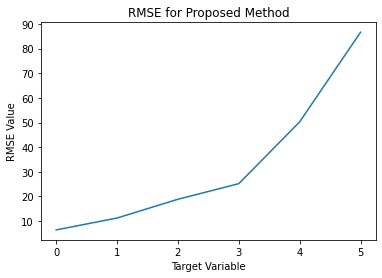

In [36]:
RMSE_new = []
for i in range(len(Boston_rmse)):
    RMSE = np.mean([Boston_rmse[i],Atlanta_rmse[i],Chicago_rmse[i],Philadelphia_rmse[i]])
    RMSE_new.append(RMSE)
print(RMSE_new)
print("\nMean RMSE: ", np.mean(RMSE_new))
plt.plot(RMSE_new)
plt.title('RMSE for Proposed Method')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()   

In [37]:
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 846.3155250549316


## Experiment 3: With value of EPS = 0.9

In [38]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [39]:
def get_dummy(df,column):
    df_dummy = pd.get_dummies(df[column], prefix=f'cat{column}')
    return df_dummy

In [40]:
needs_encoding = ['EntryHeading','ExitHeading']
for i in needs_encoding:
    encode = get_dummy(train_df,i)
    test_encode = get_dummy(test_df,i)
    train_df = pd.concat([train_df, encode], axis=1)
    test_df = pd.concat([test_df, encode], axis=1)

In [41]:
Atlanta_train = train_df[train_df['City']=='Atlanta']
Boston_train = train_df[train_df['City']=='Boston']
Chicago_train = train_df[train_df['City']=='Chicago']
Philadelphia_train = train_df[train_df['City']=='Philadelphia']

In [42]:
model_not_X = ['RowId','EntryStreetName',
       'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Weekend',
       'Path', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'City']  

In [43]:
Atlanta_X = Atlanta_train.drop(model_not_X, axis = 1)
Atlanta_y1 = Atlanta_train["TotalTimeStopped_p20"]
Atlanta_y2 = Atlanta_train["TotalTimeStopped_p50"]
Atlanta_y3 = Atlanta_train["TotalTimeStopped_p80"]
Atlanta_y4 = Atlanta_train["DistanceToFirstStop_p20"]
Atlanta_y5 = Atlanta_train["DistanceToFirstStop_p50"]
Atlanta_y6 = Atlanta_train["DistanceToFirstStop_p80"]

In [44]:
Boston_X = Boston_train.drop(model_not_X, axis = 1)
Boston_y1 = Boston_train["TotalTimeStopped_p20"]
Boston_y2 = Boston_train["TotalTimeStopped_p50"]
Boston_y3 = Boston_train["TotalTimeStopped_p80"]
Boston_y4 = Boston_train["DistanceToFirstStop_p20"]
Boston_y5 = Boston_train["DistanceToFirstStop_p50"]
Boston_y6 = Boston_train["DistanceToFirstStop_p80"]

In [45]:
Chicago_X = Chicago_train.drop(model_not_X, axis = 1)
Chicago_y1 = Chicago_train["TotalTimeStopped_p20"]
Chicago_y2 = Chicago_train["TotalTimeStopped_p50"]
Chicago_y3 = Chicago_train["TotalTimeStopped_p80"]
Chicago_y4 = Chicago_train["DistanceToFirstStop_p20"]
Chicago_y5 = Chicago_train["DistanceToFirstStop_p50"]
Chicago_y6 = Chicago_train["DistanceToFirstStop_p80"]

In [46]:
Philadelphia_X = Philadelphia_train.drop(model_not_X, axis = 1)
Philadelphia_y1 = Philadelphia_train["TotalTimeStopped_p20"]
Philadelphia_y2 = Philadelphia_train["TotalTimeStopped_p50"]
Philadelphia_y3 = Philadelphia_train["TotalTimeStopped_p80"]
Philadelphia_y4 = Philadelphia_train["DistanceToFirstStop_p20"]
Philadelphia_y5 = Philadelphia_train["DistanceToFirstStop_p50"]
Philadelphia_y6 = Philadelphia_train["DistanceToFirstStop_p80"]

In [47]:
start = time.time()

In [48]:
def clustering(data):
    model = DBSCAN(eps=0.9)
    model.fit(data)
    return model.labels_

In [49]:
def clustering_plus_randomforest(X, Y):
    clustering_variables = ['Latitude', 'Longitude','Hour','Month']
    clustering_model_data = X.loc[:,clustering_variables]
    labels = clustering(clustering_model_data)
    X["clusteringlabel"] = labels
    
    #Creating the training and test sets
    X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.3,random_state = 23)
    
    #Creating the random forest regressor object
    regressor = RandomForestRegressor(n_estimators = 50, random_state = 23)

    #Fitting the regressor with training data
    regressor.fit(X_train, y_train)
    
    #Making predictions for the testing data
    y_pred = regressor.predict(X_validate)

    #Returning the RSME value
    return sqrt(mean_squared_error(y_validate, y_pred))

In [50]:
#Boston
Boston_outcome = [Boston_y1,Boston_y2,Boston_y3,Boston_y4,Boston_y5,Boston_y6]
Boston_rmse = []
for i in range(len(Boston_outcome)):
    RMSE = clustering_plus_randomforest(Boston_X, Boston_outcome[i])
    Boston_rmse.append(RMSE)

In [51]:
#Atlanta
Atlanta_outcome = [Atlanta_y1,Atlanta_y2,Atlanta_y3,Atlanta_y4,Atlanta_y5,Atlanta_y6]
Atlanta_rmse = []
for i in range(len(Atlanta_outcome)):
    RMSE = clustering_plus_randomforest(Atlanta_X, Atlanta_outcome[i])
    Atlanta_rmse.append(RMSE)

In [52]:
#Chicago
Chicago_outcome = [Chicago_y1,Chicago_y2,Chicago_y3,Chicago_y4,Chicago_y5,Chicago_y6]
Chicago_rmse = []
for i in range(len(Chicago_outcome)):
    RMSE = clustering_plus_randomforest(Chicago_X, Chicago_outcome[i])
    Chicago_rmse.append(RMSE)

In [53]:
#Philadelphia    
Philadelphia_outcome = [Philadelphia_y1,Philadelphia_y2,Philadelphia_y3,Philadelphia_y4,Philadelphia_y5,Philadelphia_y6]
Philadelphia_rmse = []
for i in range(len(Philadelphia_outcome)):
    RMSE = clustering_plus_randomforest(Philadelphia_X, Philadelphia_outcome[i])
    Philadelphia_rmse.append(RMSE) 

[6.370148548016179, 11.197254077937405, 18.82317034124862, 25.154462864151114, 50.26752136313581, 86.66250088619314]

Mean RMSE:  33.07917634678038


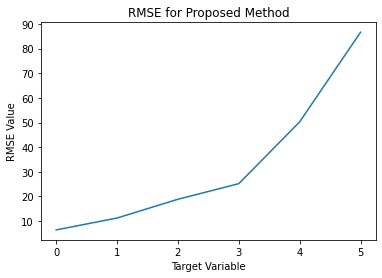

In [54]:
RMSE_new = []
for i in range(len(Boston_rmse)):
    RMSE = np.mean([Boston_rmse[i],Atlanta_rmse[i],Chicago_rmse[i],Philadelphia_rmse[i]])
    RMSE_new.append(RMSE)
print(RMSE_new)
print("\nMean RMSE: ", np.mean(RMSE_new))
plt.plot(RMSE_new)
plt.title('RMSE for Proposed Method')
plt.xlabel('Target Variable')
plt.ylabel('RMSE Value')
plt.show()  

In [55]:
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 727.1185600757599


## Thus, from this we can conclude that the value of eps = 0.9 performs the best and needs the least amount of computational time